In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import roc_curve, auc

### Function to generate confusion matrix

In [0]:
def confusionMatrix(predicted, actual, threshold):
  if len(predicted) != len(actual):
    return -1
  tp = 0.0
  fp = 0.0
  tn = 0.0
  fn = 0.0
  for i in range(len(actual)):
    if actual[i] > 0.5: #labels that are 1.0 (denote inauthentic bank notes)
      if predicted[i] > threshold:
        tp += 1.0 
      else:
        fn += 1.0 
    else: #labels that are 0.0 (denote authentic bank notes)
      if predicted[i] < threshold:
        tn += 1.0
      else:
        fp += 1.0 
  rtn = [tp, fn, fp, tn]
  return rtn

In [4]:
from google.colab import files
uploaded = files.upload()

Saving data_banknote_authentication.csv to data_banknote_authentication.csv


### Parse banknote data into a pandas dataframe

In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data_banknote_authentication.csv']), header=None)

In [0]:
df.columns = ["variance","skewness","kurtosis","entropy","output"]

In [7]:
df.head()

,variance,skewness,kurtosis,entropy,output
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [8]:
df.shape

(1372, 5)

In [9]:
df.describe()

,variance,skewness,kurtosis,entropy,output
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


### Data analysis

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


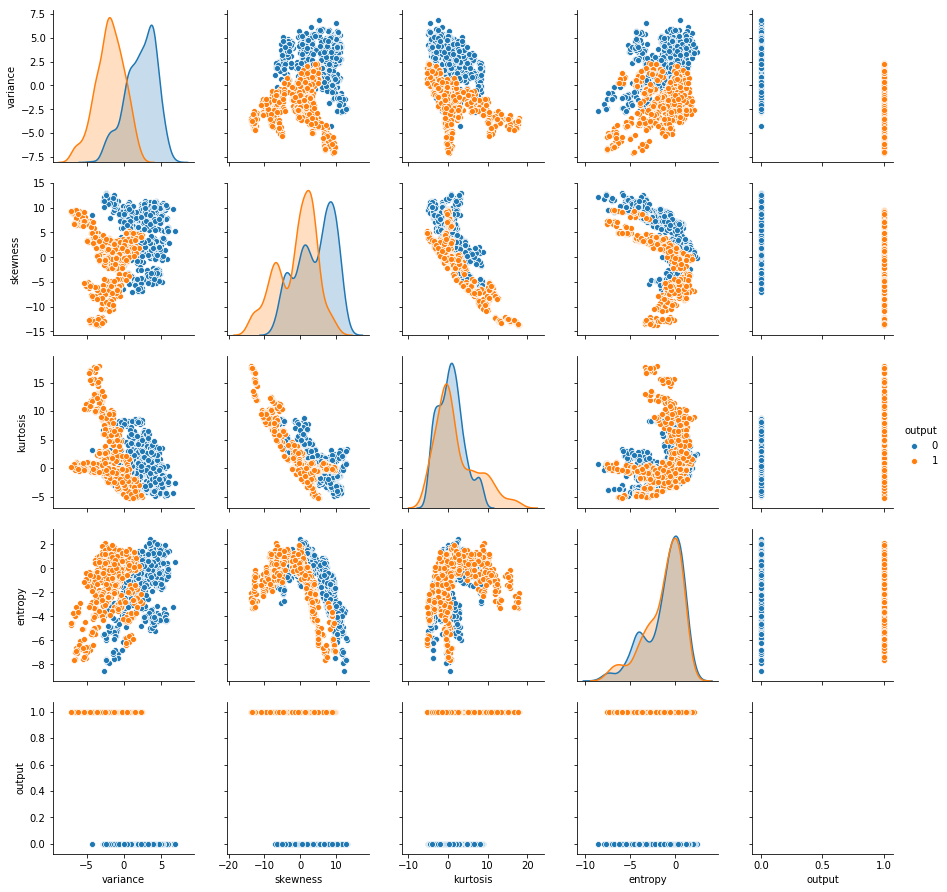

In [10]:
sns.pairplot(df, hue='output')

### Ordinary Least Square Regression (OLS)

In [0]:
from statsmodels.compat import lzip
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [12]:
banknote_model = ols("output ~ variance + skewness + kurtosis + entropy", data=df).fit()
banknote_model_summary = banknote_model.summary()
print(banknote_model_summary)

                            OLS Regression Results                            
Dep. Variable:                 output   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     2187.
Date:                Fri, 11 Oct 2019   Prob (F-statistic):               0.00
Time:                        01:39:17   Log-Likelihood:                 385.64
No. Observations:                1372   AIC:                            -761.3
Df Residuals:                    1367   BIC:                            -735.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7980      0.008    103.927      0.0

### Partial Regression Plots

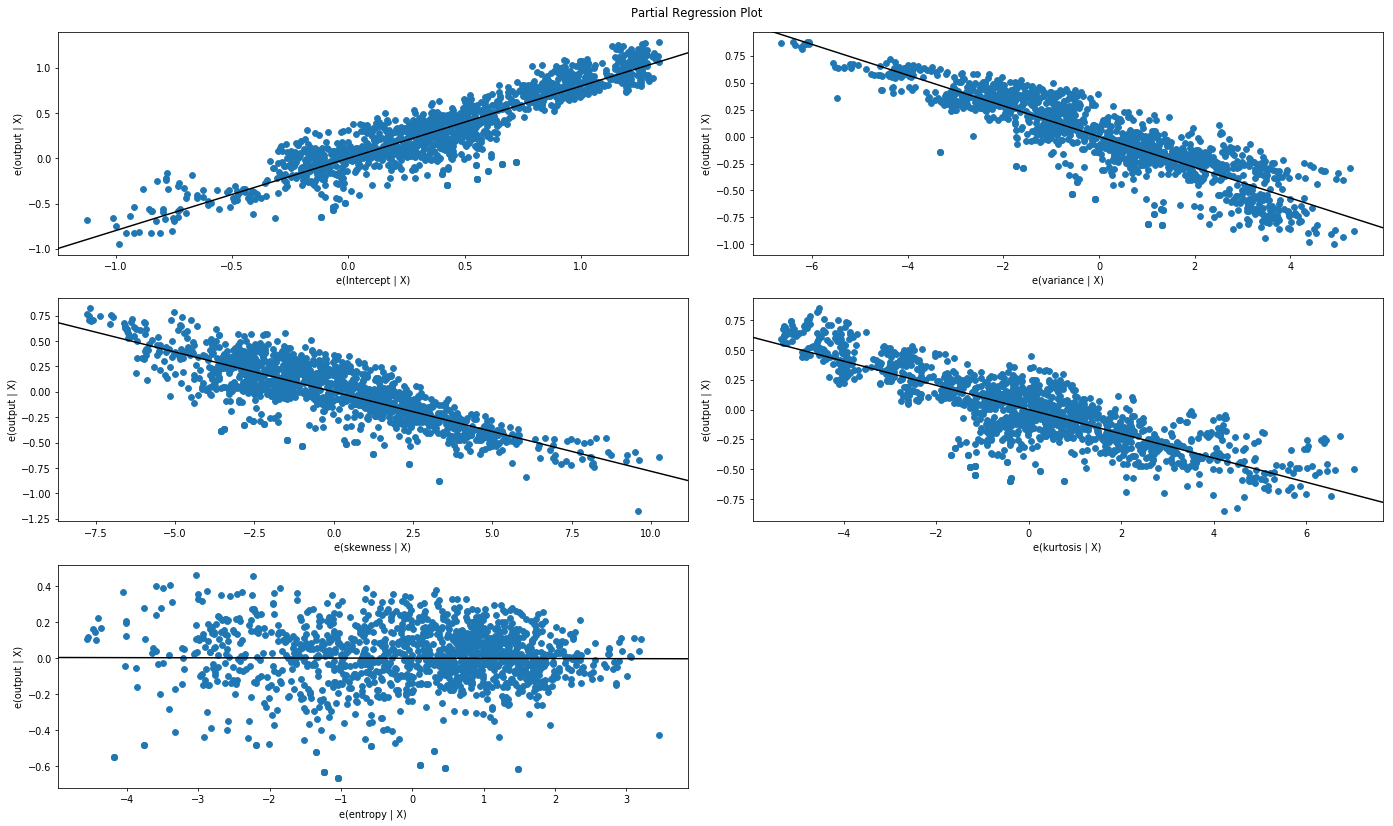

In [13]:
#Partial Regression Plots
fig = plt.figure(figsize=(20,12), dpi=70)
fig = sm.graphics.plot_partregress_grid(banknote_model, fig=fig)

### Prepare the data
Break the data (attributes and labels) into two subsets: a training set and a test set.

In [0]:
data_copy = df.copy()

In [0]:
train_set = data_copy.sample(frac=0.75)
test_set = data_copy.drop(train_set.index)
train_set_labels = train_set.pop('output')
test_set_labels = test_set.pop('output')

In [0]:
train = np.array(train_set)
test = np.array(test_set)
train_labels = np.array(train_set_labels)
test_labels = np.array(test_set_labels)

In [17]:
train.shape

(1029, 4)

In [18]:
test.shape

(343, 4)

In [19]:
train_labels.shape

(1029,)

In [20]:
test_labels.shape

(343,)

### Create the model
Using Linear Regression

In [21]:
model = linear_model.LinearRegression()
model.fit(train,train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Train the model
Train the classifier using training set

In [0]:
trainPredictions = model.predict(train)

In [23]:
df1 = pd.DataFrame({'Actual': train_labels, 'Predicted': trainPredictions.flatten()})
df1

,Actual,Predicted
0,1,0.645330
1,1,0.776496
2,1,0.896378
3,0,-0.251713
4,1,1.002151
5,0,0.051830
6,1,0.768369
7,0,-0.070300
8,1,0.842181
9,1,0.933040


### Generate confusion matrix for in-sample data

In [0]:
#A list of 50 evenly spaced threshold values between 0 and 1
t = np.linspace(0,1,50)

In [25]:
t

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

In [26]:
for threshold in t:  
  confusionMatTrain = confusionMatrix(trainPredictions, train_labels, threshold)
  tp = confusionMatTrain[0]
  fn = confusionMatTrain[1]
  fp = confusionMatTrain[2]
  tn = confusionMatTrain[3]
  print("For Threshold value = "+str(threshold))
  print("tp = " + str(tp) + "\tfn = " + str(fn) + "\n" + "fp = " + str(fp) + "\ttn = " + str(tn))
  print("Error Rate = "+str((fp+fn)/(tp+fn+fp+tn)) + '\n')

For Threshold value = 0.0
tp = 452.0	fn = 0.0
fp = 353.0	tn = 224.0
Error Rate = 0.3430515063168124

For Threshold value = 0.02040816326530612
tp = 452.0	fn = 0.0
fp = 319.0	tn = 258.0
Error Rate = 0.3100097181729835

For Threshold value = 0.04081632653061224
tp = 452.0	fn = 0.0
fp = 278.0	tn = 299.0
Error Rate = 0.27016520894071916

For Threshold value = 0.061224489795918366
tp = 452.0	fn = 0.0
fp = 249.0	tn = 328.0
Error Rate = 0.24198250728862974

For Threshold value = 0.08163265306122448
tp = 452.0	fn = 0.0
fp = 225.0	tn = 352.0
Error Rate = 0.21865889212827988

For Threshold value = 0.1020408163265306
tp = 452.0	fn = 0.0
fp = 204.0	tn = 373.0
Error Rate = 0.19825072886297376

For Threshold value = 0.12244897959183673
tp = 452.0	fn = 0.0
fp = 182.0	tn = 395.0
Error Rate = 0.17687074829931973

For Threshold value = 0.14285714285714285
tp = 452.0	fn = 0.0
fp = 160.0	tn = 417.0
Error Rate = 0.1554907677356657

For Threshold value = 0.16326530612244897
tp = 452.0	fn = 0.0
fp = 136.0	tn

### Evaluate the model
Evaluate using test set.

In [0]:
testPredictions = model.predict(test)

In [28]:
df2 = pd.DataFrame({'Actual': test_labels, 'Predicted': testPredictions.flatten()})
df2

,Actual,Predicted
0,0,-0.119137
1,0,-0.176994
2,0,-0.035348
3,0,0.134698
4,0,0.017952
5,0,0.148486
6,0,-0.128788
7,0,-0.036155
8,0,-0.171431
9,0,0.138197


### Generate confusion matrix for test data and calculate misclassification(error) rate 

In [29]:
errors = []
for threshold in t:  
  conMatTest = confusionMatrix(testPredictions, test_labels, threshold)
  tp = conMatTest[0]
  fn = conMatTest[1]
  fp = conMatTest[2]
  tn = conMatTest[3]
  print("For Threshold value = "+str(threshold))
  print("tp = " + str(tp) + "\tfn = " + str(fn) + "\n" + "fp = " + str(fp) + "\ttn = " + str(tn))
  #Misclassification Rate: Overall, how often is it wrong?
  err = (fp+fn)/(tp+fn+fp+tn)
  errors.append(err)
  print("Error Rate = "+str(err) + '\n')

For Threshold value = 0.0
tp = 158.0	fn = 0.0
fp = 105.0	tn = 80.0
Error Rate = 0.30612244897959184

For Threshold value = 0.02040816326530612
tp = 158.0	fn = 0.0
fp = 98.0	tn = 87.0
Error Rate = 0.2857142857142857

For Threshold value = 0.04081632653061224
tp = 158.0	fn = 0.0
fp = 93.0	tn = 92.0
Error Rate = 0.27113702623906705

For Threshold value = 0.061224489795918366
tp = 158.0	fn = 0.0
fp = 78.0	tn = 107.0
Error Rate = 0.22740524781341107

For Threshold value = 0.08163265306122448
tp = 158.0	fn = 0.0
fp = 70.0	tn = 115.0
Error Rate = 0.20408163265306123

For Threshold value = 0.1020408163265306
tp = 158.0	fn = 0.0
fp = 60.0	tn = 125.0
Error Rate = 0.1749271137026239

For Threshold value = 0.12244897959183673
tp = 158.0	fn = 0.0
fp = 56.0	tn = 129.0
Error Rate = 0.16326530612244897

For Threshold value = 0.14285714285714285
tp = 158.0	fn = 0.0
fp = 49.0	tn = 136.0
Error Rate = 0.14285714285714285

For Threshold value = 0.16326530612244897
tp = 158.0	fn = 0.0
fp = 39.0	tn = 146.0
E

Text(0, 0.5, 'Error rate')

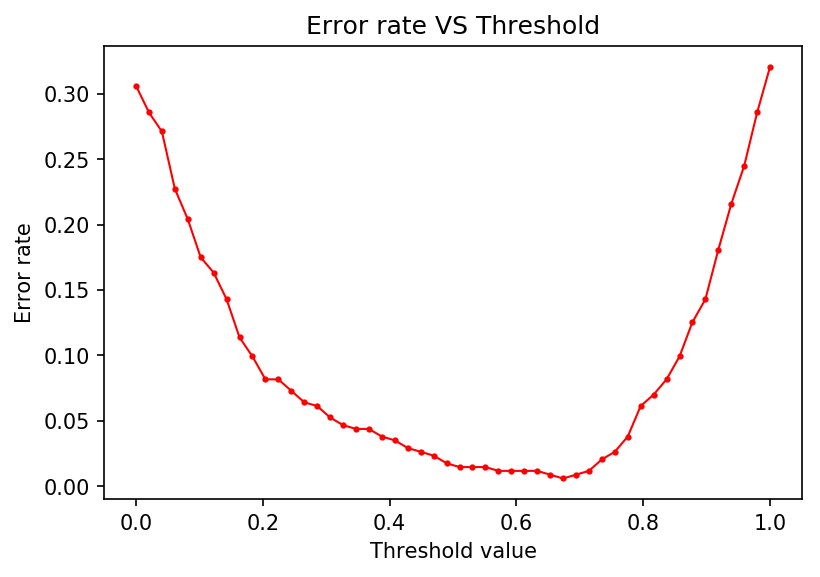

In [30]:
plt.figure(dpi=150)
plt.plot(t,errors,'-ro', linewidth=1, markersize=2)
plt.title('Error rate VS Threshold')
plt.xlabel('Threshold value')
plt.ylabel('Error rate')

### Calculate area under ROC for in-sample data

AUC for in-sample ROC curve: 0.999701


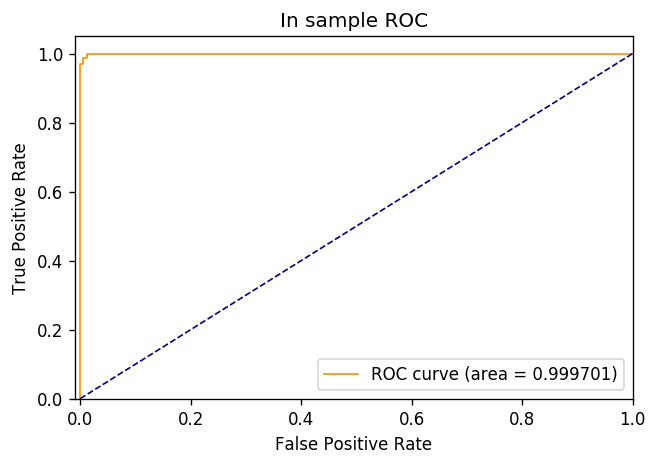

In [31]:
fpr, tpr, thresholds = roc_curve(train_labels,trainPredictions)
roc_auc = auc(fpr, tpr)
print( 'AUC for in-sample ROC curve: %f' % roc_auc)
plt.figure(dpi=120)
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('In sample ROC')
plt.legend(loc="lower right")
plt.show()

### Calculate area under ROC for out-sample data

AUC for out-of-sample ROC curve: 0.999829


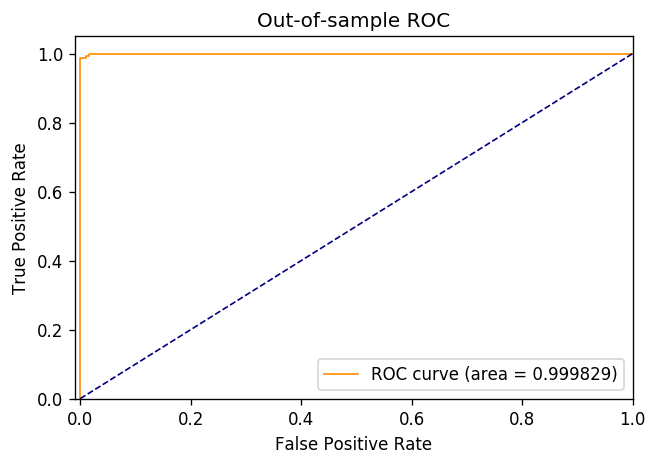

In [32]:
fpr, tpr, thresholds = roc_curve(test_labels,testPredictions)
roc_auc = auc(fpr, tpr)
print( 'AUC for out-of-sample ROC curve: %f' % roc_auc)
plt.figure(dpi=120)
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Out-of-sample ROC')
plt.legend(loc="lower right")
plt.show()